# Classification 

- learn model (귀납)
- apply model (연역)

## Evaluation Metrics (평가지표)
### Confusion Matrix

In [ ]:
# accuracy = (f11+f00) /(f10+f11+f01+f00)

# error = (f10+f01) /(f10+f11+f01+f00)

# 01. Decision Tree 

- root, internal, leaf node 
- attribute test condition 

- 좋은 트리란? 사이즈가 작고, 정확도가 높음 

- 성능이 좋은 것은 expensive 
- greedy가 = locally optimal 할수도 => optimal 포기 
- "Hunt's algorithm"

## 1-1. Hunt's Algorithm

1) single root node로 시작 
2) 어떤 기준으로 나눌지 결정 
3) stopping criterion 설정 
    - depth 기준으로 멈추기
    - 90% 이상 단일 클래스면 멈추기 
    - 노드 개수로 멈추기 

In [13]:
home_owner = [1,0,0,1,0,0,1,0,0,0]
marital = ["1","2","1","2","3","2","3","1","2","1"]
income = [125,100,70,120,95,60,220,85,75,90]
default = ["no","no","no","no","yes","no","no","yes","no","yes"]

import pandas as pd 
df = pd.DataFrame({
    "home" : home_owner, 
    "marital" : marital, 
    "income" : income, 
    "default" : default
})

In [14]:
df

,home,marital,income,default
0,1,1,125,no
1,0,2,100,no
2,0,1,70,no
3,1,2,120,no
4,0,3,95,yes
5,0,2,60,no
6,1,3,220,no
7,0,1,85,yes
8,0,2,75,no
9,0,1,90,yes


In [15]:
# 모델 학습 
from sklearn.tree import DecisionTreeClassifier


x = df.drop("default", axis = 1)
y = df['default']

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(x,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

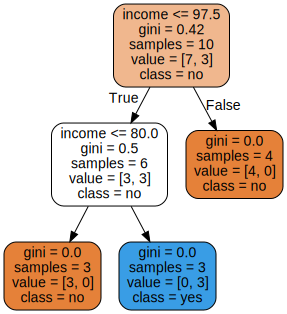

In [19]:
# 시각화 
from sklearn.tree import export_graphviz

export_graphviz(
    tree, # 학습한 모형
    out_file = 'tree.dot', # .dot 파일 저장 위치
    feature_names = df.columns[:-1], # 사용한 변수 이름
    class_names = df["default"].unique(), # 예측할 타겟 클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 1-2. Design Issues of DT 

1) splitting criterion 

**attribute**
- binary 
- nominal 
- ordinal 
- continuous 


**selecting attribute**
- pure node 만드는 속성 

2) stopping criterion 


## 1-3. Impurity Measures 

## 1) Entropy 엔트로피 지수 = 예상되는 정보량
- 균일할수록 얻을 수 있는 정보량이 적다 
- 즉, pure하다 

- 0(pure) ~ 1(chaos)

## 2) Gini index = 불평등 정도 
- 0(pure) ~ 0.5(불평등)

## 3) Classification Error 
- 0(pure) ~ 1(unpure)

In [36]:
data1 = [1,1,1,2,2,2]
data2 = [1,1,1,1,1,2]
data3 = [2,2,2,2,2,2]

# entropy 

# gini 
def gini(data) : 
    label = list(set(data))
    temp = []
    for i in label : 
        temp.append(data.count(i)/len(data))
    result = 1 
    for j in temp : 
        result -= j**2
    return result 

# classification error 
def classification_error(data) : 
    label = list(set(data))
    temp = []
    for i in label : 
        temp.append(data.count(i)/len(data))
    result = 1 - max(temp)
    return result 

In [37]:
print("gini : " , gini(data1))
print("classification error : " ,classification_error(data1))

gini :  0.5
classification error :  0.5


In [38]:
print("gini : " , gini(data2))
print("classification error : " ,classification_error(data2))

gini :  0.2777777777777777
classification error :  0.16666666666666663


In [39]:
print("gini : " , gini(data3))
print("classification error : " ,classification_error(data3))

gini :  0.0
classification error :  0.0


## 1-4. iris 데이터로 DT 구현해보기

### 정말 아무런 전처리 없이 해보기

In [2]:
# 데이터 불러오기 
from sklearn.datasets import load_iris 

iris = load_iris()

In [3]:
# 데이터 프레임 생성 
x = iris.data
y = iris.target

import pandas as pd 

df_feature = pd.DataFrame(data = x , columns= iris.feature_names)
df_target = pd.DataFrame({"target" : y})

In [4]:
# 데이터 나누기 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(df_feature, df_target, test_size = 0.2, random_state = 100)

In [5]:
# 모델 생성하기 
from sklearn.tree import DecisionTreeClassifier # 모듈 불러오기 

tree = DecisionTreeClassifier() # 모델 인스턴스 생성 
# 기본 gini 계수 사용 

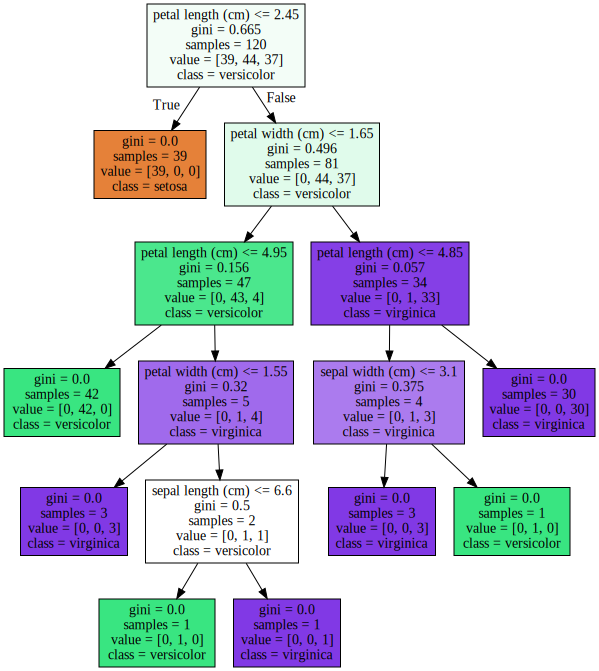

In [6]:
tree.fit(x_train, y_train)

# 그려보기 

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names = iris.target_names, 
                           feature_names = iris.feature_names, impurity=True, filled=True)
import graphviz
with open("tree.dot") as f : 
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
# accuracy 확인 

from sklearn.metrics import accuracy_score

y_predict = tree.predict(x_test)
print(f"Accuracy :{accuracy_score(y_test,y_predict)}")

Accuracy :0.9666666666666667


### 파라미터 정리하기 

1) 전처리 : 데이터 스케일링
2) splitting criterion : 불순도 지수 기준(지니계수, 엔트로피 지수 비교) 
3) stopping criterion : max_depth 설정해보기

In [24]:
# 데이터 특성 
df_feature.head()

# 해석 : 다 연속형 데이터군 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# 데이터 스케일링 : 정규화 작업을 해줄 것이다 

from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame(StandardScaler().fit_transform(df_feature), columns= iris.feature_names)
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [23]:
# 데이터 나누기 
x_train, x_test, y_train, y_test= train_test_split(df_scaled, df_target, test_size = 0.2, random_state = 100)


# 모델 생성 
# split : 불순도 지수를 gini가 아닌 entropy로 사용해보기 
## 사실, 모델 성능에는 문제가 없음, 다만 stop 기준에 영향을 줌 

# stop : max_depth 설정 (오버피팅 막기)
## 원래는 min_samples_split도 설정하고 싶었지만, iris는 데이터 수가 적기 때문에 디폴트 값 2로 사용했음 

# entropy로 했을 때
tree_en = DecisionTreeClassifier(criterion = "entropy", max_depth= 3, min_samples_split=2)

# gini로 했을 때
tree_gini = DecisionTreeClassifier(criterion = "gini", max_depth= 3, min_samples_split=2)

In [24]:
# 모델 훈련
tree_en.fit(x_train, y_train)
tree_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

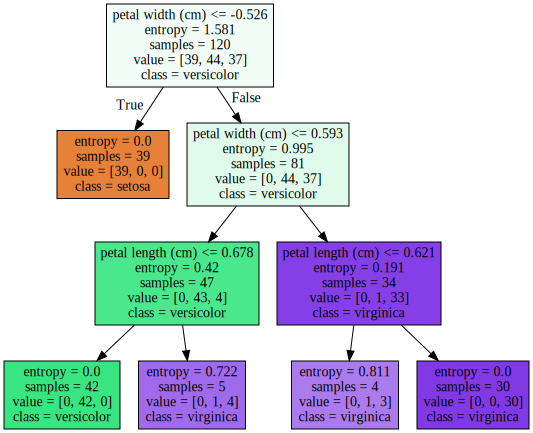

In [25]:
# tree_en 그려보기 
export_graphviz(tree_en, out_file="tree_en.dot", class_names = iris.target_names, 
                           feature_names = iris.feature_names, impurity=True, filled=True)
with open("tree_en.dot") as f : 
    dot_graph = f.read()
graphviz.Source(dot_graph)

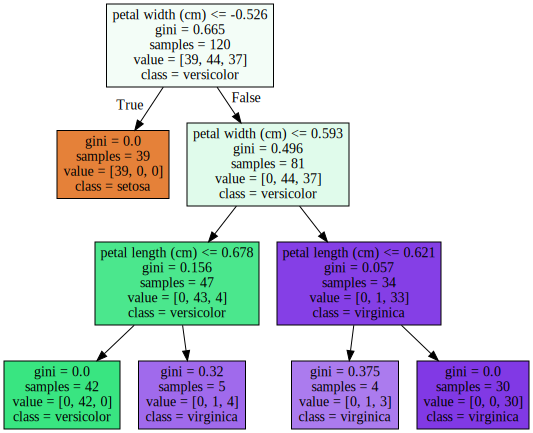

In [26]:
# tree_gini 그려보기 
export_graphviz(tree_gini, out_file="tree_gini.dot", class_names = iris.target_names, 
                           feature_names = iris.feature_names, impurity=True, filled=True)
with open("tree_gini.dot") as f : 
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [27]:
# accuray 측정 

from sklearn.metrics import accuracy_score

y_en = tree_en.predict(x_test)
y_gini = tree_gini.predict(x_test)

en_accuracy = accuracy_score(y_test,y_en)
gini_accuracy = accuracy_score(y_test,y_gini)

print(f"엔트로피 : {en_accuracy}, 지니계수 : {gini_accuracy}")


# 흠.... 데이터가 너무 작아서일까 전혀 증가하지 않았군 
# 아직은 잘 모르겠다 어떻게 해야 증가시킬 수 있을 것인가...? 

엔트로피 : 0.9666666666666667, 지니계수 : 0.9666666666666667


# 02. KNN 

In [2]:
# Majority voting 

from sklearn.datasets import load_iris 
iris = load_iris()

In [26]:
from sklearn.preprocessing import MinMaxScaler

x = iris.data
y = iris.target

In [27]:
scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)


In [29]:
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.9473684210526315

In [30]:
# k값 변경해보기 

for i in range(3,13) : 
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    print("k = {} : {}".format(i, model.score(x_test, y_test)))

k = 3 : 0.9473684210526315
k = 4 : 0.9473684210526315
k = 5 : 0.9736842105263158
k = 6 : 0.9736842105263158
k = 7 : 0.9736842105263158
k = 8 : 0.9473684210526315
k = 9 : 0.9473684210526315
k = 10 : 0.9473684210526315
k = 11 : 0.9473684210526315
k = 12 : 0.9473684210526315


In [31]:
# Distance-weighted voting 

for i in range(3,13) : 
    model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    model.fit(x_train,y_train)
    print("k = {} : {}".format(i, model.score(x_test, y_test)))

k = 3 : 0.9473684210526315
k = 4 : 0.9473684210526315
k = 5 : 0.9473684210526315
k = 6 : 0.9736842105263158
k = 7 : 0.9473684210526315
k = 8 : 0.9473684210526315
k = 9 : 0.9473684210526315
k = 10 : 0.9473684210526315
k = 11 : 0.9473684210526315
k = 12 : 0.9473684210526315


왜 오히려 정확도가 떨어지는거지..?
그리고 정규화하니깐 더 정확도가 떨어짐...
왜죠? 그리고 그냥 표준편차로 해주는 것보다 minmax가 더 정확도 높게 나옴

# 03. Naive Bayes Classifier 

In [42]:
# 사전 확률 P(y)

def prior_prob(target, y_class) : 
    count = 0 
    for value in target : 
        if value == y_class : 
            count +=1
    return count /len(target)


In [40]:
# 조건부 확률 p(x|y) 

def condition_prob(data,target, x_col, x_class, y_class) : 
    count = 0 
    for i, value in enumerate(target) : 
        if (value == y_class) and (data[i][x_col]==x_class) : 
            count+=1

    y_count = 0 
    for value in target : 
        if value == y_class : 
            y_count +=1
    
    return count/y_count

In [49]:
import numpy as np 

data = np.array([[4,3,5,1,6], [0,8,7,9,2]])
target = np.array([[1],[0]])

condition_prob(data, target,1, 3, 1)

1.0

In [45]:
# 사후 확률 P(y|x) 이게 우리가 구하는 답 ~ 나이브 베이즈 구현 
def naive_bayes(data,target,x_class, y_class) : 
    result = prior_prob(target,y_class)

    for i, value in enumerate(x_class) : 
        result = result*condition_prob(data,target,i, value, y_class)

    return result

In [55]:
data = np.array([[1,1,0], [0,1,0], [0,1,1], [0,1,1],[1,1,0], [0,1,0], [0,1,1], [0,1,1]])

target = np.array([[1],[0],[1],[0],[1],[0],[0],[1]])

x_class = np.array([0,1,1])

y_class = 1 

naive_bayes(data,target,x_class, y_class)

0.125